In [1]:
from datetime import date
from src.market import Market
from src.portfolio import Portfolio
from src.analysis import Analysis, Benchmark, Metric
from src.rebalance import Rebalance
from src.strategy import NoStrategy, StopGainAndLoss
from src.backtest import BackTest
from src.factor.base_factor import DummyFactor
from src.factor.gyf import SalesGrowthFactor, SECTOR_ETF

In [2]:
start_date = date.fromisoformat("2023-01-01")
end_date = date.fromisoformat("2023-12-21")
# security_universe = ["^SPX", "^IXIC", "^RUT", "QQQ"]
security_universe = SECTOR_ETF

market = Market(security_universe)
# factor = DummyFactor(security_universe, start_date, end_date)
factor = SalesGrowthFactor(security_universe, start_date, end_date)
portfolio = Portfolio(100.0, start_date, end_date)
factor.set_portfolio_at_start(portfolio)

blacklist = []
# strategy = NoStrategy(portfolio, blacklist)
strategy = StopGainAndLoss(portfolio, blacklist)
strategy.set_limit(0.3, 0.3)
rebalance = Rebalance(180, portfolio, factor, blacklist)

couldnt find sales growth data for GDXJ
build factor value: [('GDX', 160.25565314292916), ('XOP', 53.486408869425446), ('XLE', 40.300533962249744), ('IYE', 40.300533962249744), ('OIH', 19.531933307647687), ('XLY', 12.292265313012262), ('XME', 12.291214108467091), ('XLI', 12.050679381688424), ('XLF', 11.854719308706423), ('XLB', 11.488342783667825), ('IYR', 11.267136988432513), ('VNQ', 11.237170999700375), ('KBE', 8.405285321749172), ('XLV', 8.216539669036864), ('XLK', 6.92548937267727), ('KRE', 5.8235141436258955), ('XLU', 5.463424523671478), ('SMH', 5.31036417824881), ('XTL', 5.191728591918933), ('XLP', 3.870024230745097), ('IBB', 1.0704524815082586), ('XHB', -0.06743812561034807), ('ITB', -0.486247301101673), ('XRT', -5.30493831634522), ('GDXJ', -100)]


In [3]:
backtest = BackTest(portfolio, strategy, market, rebalance)
backtest.run()
benchmark = Benchmark("^SPX", start_date, end_date).get_performance()

couldnt find sales growth data for GDXJ
build factor value: [('GDX', 160.25565314292916), ('XOP', 53.486408869425446), ('XLE', 40.300533962249744), ('IYE', 40.300533962249744), ('OIH', 19.531933307647687), ('XLY', 12.292265313012262), ('XME', 12.291214108467091), ('XLI', 12.050679381688424), ('XLF', 11.854719308706423), ('XLB', 11.488342783667825), ('IYR', 11.267136988432513), ('VNQ', 11.237170999700375), ('KBE', 8.405285321749172), ('XLV', 8.216539669036864), ('XLK', 6.92548937267727), ('KRE', 5.8235141436258955), ('XLU', 5.463424523671478), ('SMH', 5.31036417824881), ('XTL', 5.191728591918933), ('XLP', 3.870024230745097), ('IBB', 1.0704524815082586), ('XHB', -0.06743812561034807), ('ITB', -0.486247301101673), ('XRT', -5.30493831634522), ('GDXJ', -100)]
rebalance on 2023-01-03: [('GDX', -0.010000000000000009), ('XOP', -0.010000000000000009), ('XLE', -0.010000000000000009), ('IYE', -0.010000000000000009), ('OIH', -0.010000000000000009)]
couldnt find sales growth data for GDXJ
build fac

portfolio annulized return: -0.055646704680739956
portfolio annulized return relative to benchmark: -0.3045947604650935
information ratio: -0.0018731862469660516


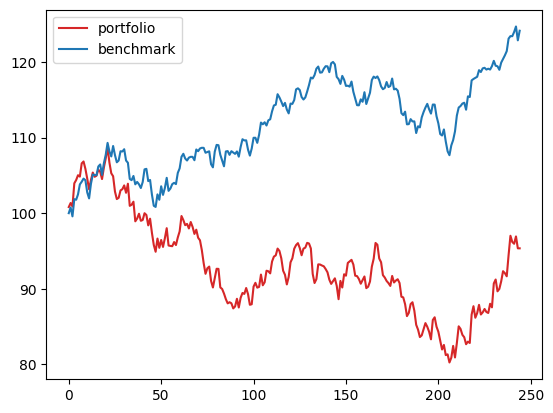

In [4]:
metric = Metric(portfolio, benchmark)
print(f"portfolio annulized return: {metric.annualized_return()}")
print(
    f"portfolio annulized return relative to benchmark: {metric.annualized_return_relative_to_benchmark()}"
)
print(f"information ratio: {metric.information_ratio()}")

analysis = Analysis(portfolio, benchmark)
analysis.draw()